In [3]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [4]:
n_pts = 500
centers = [[-1,1], [-1,-1],[1,-1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers,cluster_std=0.4)
print(X)
print(y)



[[ 0.95219249 -0.60923137]
 [ 1.65952714 -0.31381256]
 [ 0.526137   -0.94160831]
 [-1.41959667  0.96995176]
 [-0.94002647 -0.78014296]
 [-1.60724319  0.81552503]
 [-0.82564969  0.8724172 ]
 [ 0.88319833 -1.0467727 ]
 [ 1.72626083 -1.10110012]
 [ 1.42796744 -1.36373081]
 [-0.91416557 -1.16086389]
 [-0.61034703 -0.93588251]
 [-1.58604649  1.14537822]
 [-0.44909701  0.94272961]
 [-0.59427845 -1.68359671]
 [ 0.28538926 -1.0609578 ]
 [ 1.63020037 -0.86777469]
 [ 1.74338976 -0.9765849 ]
 [ 1.02112227 -1.64830079]
 [-1.40786203  1.06717692]
 [ 0.73537974 -1.37188465]
 [-0.53991778  0.49305918]
 [-0.83445477 -0.98106325]
 [ 0.80705387 -0.56808146]
 [-1.16056577 -0.73060349]
 [ 0.67184979 -1.2490654 ]
 [-0.25482897  1.3340235 ]
 [-0.8742912   0.46949382]
 [ 1.57943063 -0.64311997]
 [-0.83355047 -1.05312047]
 [-1.17586888 -0.56471181]
 [-1.15029996  0.44811001]
 [-1.50155227  0.7448994 ]
 [ 1.27281391 -0.88137737]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [ 0.51922533 -1.18831422]
 

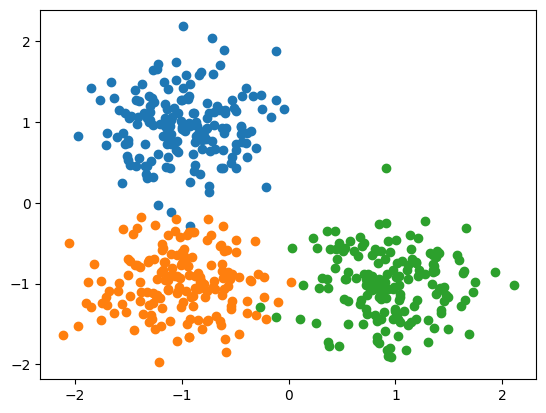

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])


In [12]:
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [7]:
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 11ms/step - loss: 0.8567 - accuracy: 0.7440
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1730 - accuracy: 0.9880
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.9880
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9880
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9880
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9880
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9880
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9880
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9880
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.9880
Epoch 11

In [8]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

In [9]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

x = -0.5
y = -0.5

point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)


AttributeError: ignored

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 1.2126 - accuracy: 0.4960
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.8440
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 0.9220
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3266 - accuracy: 0.9400
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2841 - accuracy: 0.9380
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.9380
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.9480
Epoch 8/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2304 - accuracy: 0.9520
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9500
Epoch 11

AttributeError: ignored

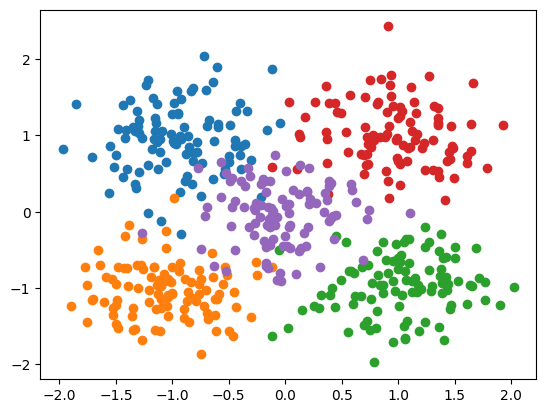

In [10]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

print(y)
y_cat = to_categorical(y, 5)
print(y_cat)
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])
#one hot encode output
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    predict_function = model.predict_classes(grid)
    z = predict_function.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

x = -0.5
y = -0.5

point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)